In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scipy

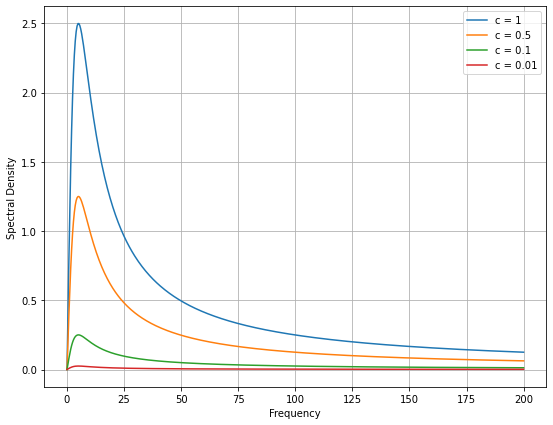

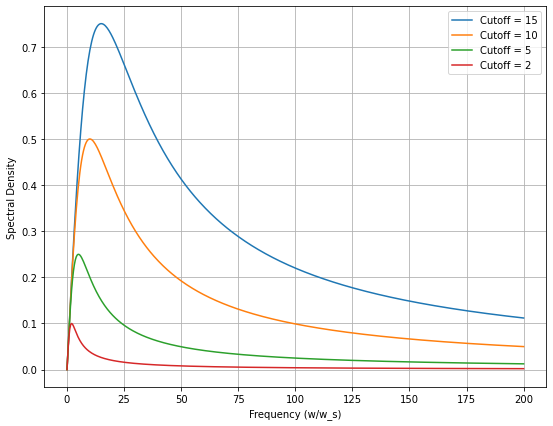

In [2]:

"""
Spektrale Dichte
"""
def spectral_density_drude(c, frequency, cutoff_frequency):
    return c*frequency/(1 + (frequency/cutoff_frequency)**2)

#Spektraledichte für verschiedene Kopplungsstärken und cutoff Frequenzen.
frequencies = np.linspace(0, 200, 500)
spectral_density_c1 = spectral_density_drude(1, frequencies, 5)
spectral_density_c05 = spectral_density_drude(0.5, frequencies, 5)
spectral_density_c01 = spectral_density_drude(0.1, frequencies, 5)
spectral_density_c001 = spectral_density_drude(0.01, frequencies, 5)

fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(frequencies, spectral_density_c1, label='c = 1')
plt.plot(frequencies, spectral_density_c05, label='c = 0.5')
plt.plot(frequencies, spectral_density_c01, label='c = 0.1')
plt.plot(frequencies, spectral_density_c001, label='c = 0.01')
ax.set_ylabel('Spectral Density')
ax.set_xlabel('Frequency')
ax.legend()
plt.grid()


#Spektraledichte für verschiedene Kopplungsstärken und cutoff Frequenzen
frequencies = np.linspace(0, 200, 500)
spectral_density_800 = spectral_density_drude(0.1, frequencies, 15)
spectral_density_400 = spectral_density_drude(0.1, frequencies, 10)
spectral_density_200 = spectral_density_drude(0.1, frequencies, 5)
spectral_density_50 = spectral_density_drude(0.1, frequencies, 2)

fig, ax2 = plt.subplots(figsize=(9, 7))
plt.plot(frequencies, spectral_density_800, label='Cutoff = 15')
plt.plot(frequencies, spectral_density_400, label='Cutoff = 10')
plt.plot(frequencies, spectral_density_200, label='Cutoff = 5')
plt.plot(frequencies, spectral_density_50, label='Cutoff = 2')
ax2.set_ylabel('Spectral Density')
ax2.set_xlabel('Frequency (w/w_s)')
ax2.legend()
plt.grid()

C:\Users\juanm\AppData\Local\Temp\ipykernel_16804\2517274475.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(np.exp(frequency/(temperature))-1)


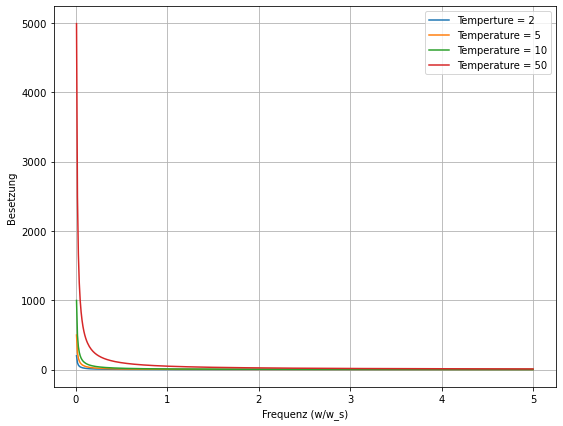

In [3]:
"""
Thermisches Bad. Gegeben durch Bose Einstein Statistik.
Frequenz in Einheiten von w/w_s, k*temp/h*w_s.
"""
def thermal_bosonic_bath(temperature, frequency):
    return 1/(np.exp(frequency/(temperature))-1)


#Besetzungszahlen für verschiedene Temperaturen.

frequencies = np.linspace(0, 5, 500)
thermal_bath_temp2 = thermal_bosonic_bath(2, frequencies)
thermal_bath_temp5 = thermal_bosonic_bath(5, frequencies)
thermal_bath_temp10 = thermal_bosonic_bath(10, frequencies)
thermal_bath_temp50 = thermal_bosonic_bath(50, frequencies)

fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(frequencies, thermal_bath_temp2, label='Temperture = 2')
plt.plot(frequencies, thermal_bath_temp5, label='Temperature = 5')
plt.plot(frequencies, thermal_bath_temp10, label='Temperature = 10')
plt.plot(frequencies, thermal_bath_temp50, label='Temperature = 50')
ax.set_ylabel('Besetzung')
ax.set_xlabel('Frequenz (w/w_s)')
ax.legend()
plt.grid()

In [4]:
zweite_teil = np.array([], dtype=complex)
type(zweite_teil)

numpy.ndarray

(6.299442469371819e-06-3.44140110564554e-06j)

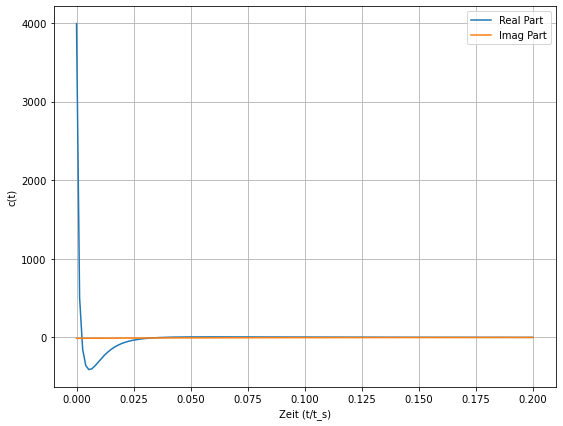

In [5]:
"""
Bad Korrelation Funktion. Zeit in Einheiten t*w_s = t/t_s
"""

def bath_correlation(t, c, cutoff_frequency, temperature, matsub_number):
    erste_teil = (c/2)*(cutoff_frequency**2)*((1/np.tan(cutoff_frequency/(2*temperature)))-complex(0,1))*np.exp(-cutoff_frequency*t)
    i =np.array(range(1, matsub_number))
    if type(t) == np.ndarray:
        zweite_teil = np.array([], dtype=complex)
        for j in t:
            matsub = np.array((2*np.pi*i*np.exp(-2*np.pi*i*j*temperature)*temperature)/(1-(2*np.pi*i/cutoff_frequency)**2), dtype=complex)
            zweite_teil = np.append(zweite_teil, (2*c*temperature)*np.sum(matsub))
    else:
        matsub = np.array((2*np.pi*i*np.exp(-2*np.pi*i*t*temperature))/(1-(2*np.pi*i*temperature/cutoff_frequency)**2), dtype=complex)
        zweite_teil = (2*c*temperature)*np.sum(matsub)
    return erste_teil - zweite_teil

times = np.linspace(0, 0.2, 150)
c = 0.1
w_cut = 15
T = 15
matsub = 50

bath_corr = bath_correlation(times, c, w_cut, T, matsub)
bath_corr_real = np.real(bath_corr)
bath_corr_imag = np.imag(bath_corr)

fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(times, bath_corr_real, label='Real Part')
plt.plot(times, bath_corr_imag, label='Imag Part')
ax.set_ylabel('c(t)')
ax.set_xlabel('Zeit (t/t_s)')
ax.legend()
plt.grid()

bath_correlation(1, c, w_cut, T, matsub)


((1.325385042949836-0.8378668706095824j),
 (1.4441371271757528-0.8387914831804779j))

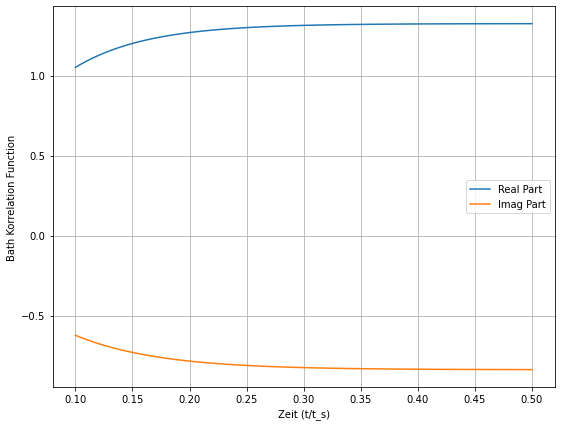

In [6]:
def bath_correlation_function(t, c, cutoff_frequency, temperatur, matsub_number, frequency):
    realpart =  scipy.integrate.quad(lambda x: np.real(np.exp(complex(
        0, -1)*frequency*x)*bath_correlation(x, c, cutoff_frequency, temperatur, matsub_number)), 0, t)
    imagpart = scipy.integrate.quad(lambda x: np.imag(np.exp(complex(
        0, -1)*x*frequency)*bath_correlation(x, c, cutoff_frequency, temperatur, matsub_number)), 0, t)
    return realpart[0] + complex(0, 1)*imagpart[0]

def bath_correlation_function_inf(c, cutoff_frequency, temperature, matsub_number, frequency):
    realpart = spectral_density_drude(c, frequency, cutoff_frequency)*thermal_bosonic_bath(temperature, frequency)
    imag_temp_ind = -c*cutoff_frequency/2
    imag_vacuum_fluc = (c*cutoff_frequency*frequency**2)/(2*(cutoff_frequency**2+frequency**2))
    i = np.array(range(1, matsub_number))
    matsub = np.array((2*np.pi*i*temperature)/((1-(2*np.pi*i*temperature/cutoff_frequency)**2)*(frequency**2 + (2*np.pi*i*temperature)**2)), dtype=complex)
    imag_thermal_noise = (frequency*c)*((-cutoff_frequency**2)/(2*(cutoff_frequency**2 + frequency**2)*np.tan(cutoff_frequency/(2*temperature)))+(2*temperature)*np.sum(matsub))
    return complex(realpart, imag_temp_ind + imag_vacuum_fluc + imag_thermal_noise)

times = np.linspace(0.1, 0.5, 120)
c = 0.1
w_cut = 15
T = 15
matsub = 50
w = 1

bath_corr_func = np.array([0]*len(times), dtype = complex)
for t in times:
    bath_corr_func[times == t] = bath_correlation_function(t, c, w_cut, T, matsub, w)

bath_corr_func_real = np.real(bath_corr_func)
bath_corr_func_imag = np.imag(bath_corr_func)

fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(times, bath_corr_func_real, label='Real Part')
plt.plot(times, bath_corr_func_imag, label='Imag Part')
ax.set_ylabel('Bath Korrelation Function')
ax.set_xlabel('Zeit (t/t_s)')
ax.legend()
plt.grid()

bath_correlation_function(100, c, w_cut, T, matsub, w), bath_correlation_function_inf(c, w_cut, T, matsub, w)

#für -w rechnen 

In [7]:
# Integral der Heisenberg Operator S(t) mal die Korrelation Function.
# Matrizen für Bad Operator und Hamilton Operator des Systems
def Szt(t, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension):
    plus_frequenz = bath_correlation_function(t, c, cutoff_frequency, temperatur, matsub_number, frequency)
    minus_frequenz = bath_correlation_function(t, c, cutoff_frequency, temperatur, matsub_number, -frequency)
    St = np.array([[0]*dimension for j in range(dimension)] , dtype=complex)
    for i in range(dimension):
        if i+1 < dimension:
            St[i][i+1] = minus_frequenz*np.sqrt(i+1)/2
        if i-1 > -1:
            St[i][i-1] = plus_frequenz*np.sqrt(i)/2
    return St

def Szt_inf(c, cutoff_frequency, temperatur, matsub_number, frequency, dimension):
    plus_frequenz = bath_correlation_function_inf(
    	 c, cutoff_frequency, temperatur, matsub_number, frequency)
    minus_frequenz = bath_correlation_function_inf(
        c, cutoff_frequency, temperatur, matsub_number, -frequency)
    St = np.array([[0]*dimension for j in range(dimension)], dtype=complex)
    for i in range(dimension):
        if i+1 < dimension:
            St[i][i+1] = minus_frequenz*np.sqrt(i+1)/2
        if i-1 > -1:
            St[i][i-1] = plus_frequenz*np.sqrt(i)/2
    return St

def S_dim(dimension):
    S = np.array([[0]*dimension for j in range(dimension)], dtype=complex)
    for i in range(dimension):
        if i+1 < dimension:
            S[i][i+1] = np.sqrt(i+1)/2
        if i-1 > -1:
            S[i][i-1] = np.sqrt(i)/2
    return S

def Hs_dim(dimension):
    Hs = np.array([[0]*dimension for j in range(dimension)], dtype=complex)
    for i in range(dimension):
        Hs[i][i] = i+1/2
    return Hs

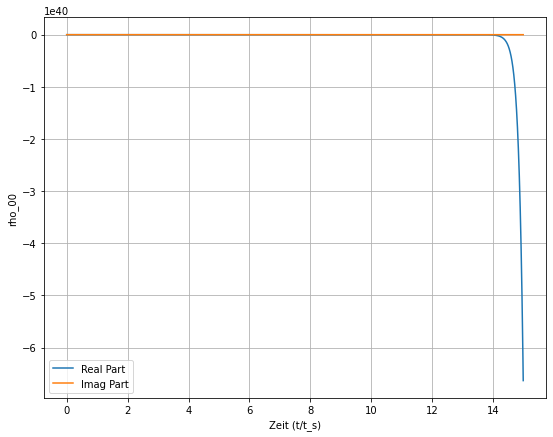

In [9]:
def Redfield(t, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension, rho):
    Sztt = Szt(t, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension)
    S = S_dim(dimension)
    Hs = Hs_dim(dimension)
    komm = Hs@rho - rho@Hs
    Dred = S@rho@Sztt.conj().T + Sztt@rho@S - S@Sztt@rho - rho@Sztt.conj().T@S
    return complex(0, -1)*komm + Dred

def euler_dynamics(t_final, time_step, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension, rho0):
    times = np.arange(0, t_final, time_step)
    rho = rho0
    rho_dynamics = np.array([[[0]*dimension for i in range(dimension)] for j in range(len(times))], dtype=complex)
    for t in times:
        rho_dynamics[times==t] = rho 
        drho = Redfield(t, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension, rho)
        rho = rho + drho*time_step
    return times, rho_dynamics

    times = np.arange(0, t_final, time_step)
    rho = rho0
    rho_dynamics = np.array([[[0]*dimension for i in range(dimension)] for j in range(len(times))], dtype=complex)
    drho = Redfield_inf(c, cutoff_frequency, temperatur,
                        matsub_number, frequency, dimension, rho)
    for t in times:
        rho_dynamics[times==t] = rho 
        rho = rho + drho*time_step
    return times, rho_dynamics

c = 0.1
w_cut = 15
T = 3
matsub = 50
w = -1
tfinal = 15
dt = 0.01
D = 7
rho0 = np.array([[0]*D for i in range(D)], dtype=complex)
rho0[1][1] = 1/2
rho0[1][0] = 1/2 
rho0[0][1] = 1/2 
rho0[0][0] = 1/2 

times, rho_dynamics = euler_dynamics(tfinal, dt,  c,  w_cut, T, matsub, w, D, rho0)

rho_00 = np.array([complex(rho_dynamics[i][0][0])] for i in range(len(times)))
rho_00 = np.array([], dtype=complex)
for i in rho_dynamics:
    rho_00 = np.append(rho_00, i[0][0])


#rho_00 = np.array([complex(rho_dynamics[i][0][0])] for i in range(len(times)))

fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(times, np.real(rho_00), label='Real Part')
plt.plot(times, np.imag(rho_00), label='Imag Part')
ax.set_ylabel('rho_00')
ax.set_xlabel('Zeit (t/t_s)')
ax.legend()
plt.grid()

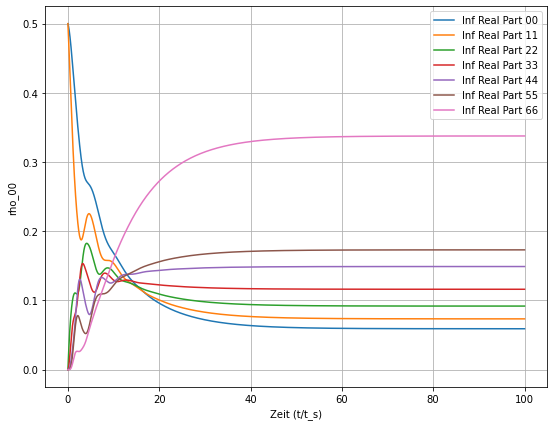

In [8]:
def Redfield_inf(c, cutoff_frequency, temperatur, matsub_number, frequency, dimension, rho):
    Sztt = Szt_inf(c, cutoff_frequency, temperatur, matsub_number, frequency, dimension)
    S = S_dim(dimension)
    Hs = Hs_dim(dimension)
    komm = Hs@rho - rho@Hs
    Dred = S@rho@Sztt.conj().T + Sztt@rho@S - S@Sztt@rho - rho@Sztt.conj().T@S
    return complex(0, -1)*komm + Dred

def euler_dynamics_inf(t_final, time_step, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension, rho0):
    times = np.arange(0, t_final, time_step)
    rho = rho0
    rho_dynamics = np.array([[[0]*dimension for i in range(dimension)] for j in range(len(times))], dtype=complex)

    for t in times:
        drho = Redfield_inf(c, cutoff_frequency, temperatur,
                            matsub_number, frequency, dimension, rho)
        rho_dynamics[times==t] = rho 
        rho = rho + drho*time_step
    return times, rho_dynamics

c = 0.1
w_cut = 15
T = 3
matsub = 50
w = -1
tfinal = 100
dt = 0.01
D = 7
rho0 = np.array([[0]*D for i in range(D)], dtype=complex)
rho0[1][1] = 1/2
rho0[1][0] = 1/2
rho0[0][1] = 1/2
rho0[0][0] = 1/2

times, rho_dynamics_inf = euler_dynamics_inf(
    tfinal, dt,  c,  w_cut, T, matsub, w, D, rho0)

rho_00_inf = np.array([], dtype=complex)
rho_11_inf = np.array([], dtype=complex)
rho_22_inf = np.array([], dtype=complex)
rho_33_inf = np.array([], dtype=complex)
rho_44_inf = np.array([], dtype=complex)
rho_55_inf = np.array([], dtype=complex)
rho_66_inf = np.array([], dtype=complex)


for i in rho_dynamics_inf:
    rho_00_inf = np.append(rho_00_inf, i[0][0])
    rho_11_inf = np.append(rho_11_inf, i[1][1])
    rho_22_inf = np.append(rho_22_inf, i[2][2])
    rho_33_inf = np.append(rho_33_inf, i[3][3])
    rho_44_inf = np.append(rho_44_inf, i[4][4])
    rho_55_inf = np.append(rho_55_inf, i[5][5])
    rho_66_inf = np.append(rho_66_inf, i[6][6])


fig, ax = plt.subplots(figsize=(9, 7))
plt.plot(times, np.real(rho_00_inf), label='Inf Real Part 00')
plt.plot(times, np.real(rho_11_inf), label='Inf Real Part 11')
plt.plot(times, np.real(rho_22_inf), label='Inf Real Part 22')
plt.plot(times, np.real(rho_33_inf), label='Inf Real Part 33')
plt.plot(times, np.real(rho_44_inf), label='Inf Real Part 44')
plt.plot(times, np.real(rho_55_inf), label='Inf Real Part 55')
plt.plot(times, np.real(rho_66_inf), label='Inf Real Part 66')
ax.set_ylabel('rho_00')
ax.set_xlabel('Zeit (t/t_s)')
ax.legend()
plt.grid()


In [30]:
"""
Odeint zum lösen anstatt euler verfahren
"""
def redfield_odeint(t, rho, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension):
    rho_real = rho[0,len(rho)/2]
    rho_imag = rho[len(rho)/2,len(rho)]
    rho = rho_real + rho_imag*complex(0, 1)
    rho = np.reshape(rho, (dimension, dimension), order='C')
    drho = Redfield(t, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension, rho)
    return drho.flatten(order='C')

def odeint_solver(times, rho0, c, cutoff_frequency, temperatur, matsub_number, frequency, dimension):
    rho = rho0.flatten(order='C')
    
    return scipy.integrate.complex_ode(redfield_odeint, rho, times, (c, cutoff_frequency, temperatur, matsub_number, frequency, dimension))

times = np.linspace(0, 10, 5)
c = 0.1
w_cut = 15
T = 15
matsub = 50
w = -1
D = 5
rho0 = np.array([[0]*D for i in range(D)], dtype=complex)
for i in range(5):
    rho0[i][i] = 1/D

#print(odeint_solver(times, rho0, c,  w_cut, T, matsub, w, D))
